In [1]:
import numpy as np
from hipscat_import.catalog.arguments import ImportArguments
from dask.distributed import Client
from hipscat_import.pipeline import pipeline_with_client
from hipscat_import.catalog.file_readers import FitsReader
from pathlib import Path

from radians_fits_reader import RadiansFitsReader

RA_COLUMN = "coord_ra"
DEC_COLUMN = "coord_dec"

input_file_list = sorted(Path("/ocean/projects/phy210048p/shared/hipscat/raw/hsc/cosmos_forced_catalog/").glob('forced_src-HSC-I-9571-4,4.fits'))

args = ImportArguments(
    sort_columns="id",
    ra_column=RA_COLUMN,
    dec_column=DEC_COLUMN,
    input_file_list=input_file_list,
    file_reader=RadiansFitsReader(ra_column=RA_COLUMN, dec_column=DEC_COLUMN, skip_column_names=["flags"]),
    output_artifact_name="cosmos_forced_i_unique_field",
    output_path="/ocean/projects/phy210048p/mardom/",
    resume=False,
)
with Client(n_workers=1) as client:
    pipeline_with_client(args, client)
    
    
    
#sorted(Path("/ocean/projects/phy210048p/shared/hipscat/raw/hsc/cosmos_forced_catalog/").glob('*.fits'))
           
           
           
import lsdb
list(lsdb.read_hipscat("/ocean/projects/phy210048p/mardom/cosmos_forced_i_unique_field").columns)

Planning  :   0%|          | 0/5 [00:00<?, ?it/s]

Mapping   :   0%|          | 0/1 [00:00<?, ?it/s]

Binning   :   0%|          | 0/2 [00:00<?, ?it/s]

Splitting :   0%|          | 0/1 [00:00<?, ?it/s]

Reducing  :   0%|          | 0/1 [00:00<?, ?it/s]

Finishing :   0%|          | 0/5 [00:00<?, ?it/s]

['id',
 'coord_ra',
 'coord_dec',
 'parent',
 'deblend_nChild',
 'base_SdssCentroid_x',
 'base_SdssCentroid_y',
 'base_SdssCentroid_xErr',
 'base_SdssCentroid_yErr',
 'base_TransformedCentroid_x',
 'base_TransformedCentroid_y',
 'base_InputCount_value',
 'base_SdssShape_xx',
 'base_SdssShape_yy',
 'base_SdssShape_xy',
 'base_SdssShape_xxErr',
 'base_SdssShape_yyErr',
 'base_SdssShape_xyErr',
 'base_SdssShape_x',
 'base_SdssShape_y',
 'base_SdssShape_instFlux',
 'base_SdssShape_instFluxErr',
 'base_SdssShape_psf_xx',
 'base_SdssShape_psf_yy',
 'base_SdssShape_psf_xy',
 'base_SdssShape_instFlux_xx_Cov',
 'base_SdssShape_instFlux_yy_Cov',
 'base_SdssShape_instFlux_xy_Cov',
 'base_TransformedShape_xx',
 'base_TransformedShape_yy',
 'base_TransformedShape_xy',
 'modelfit_DoubleShapeletPsfApprox_0_xx',
 'modelfit_DoubleShapeletPsfApprox_0_yy',
 'modelfit_DoubleShapeletPsfApprox_0_xy',
 'modelfit_DoubleShapeletPsfApprox_0_x',
 'modelfit_DoubleShapeletPsfApprox_0_y',
 'modelfit_DoubleShapeletP

In [2]:
lsdb.read_hipscat("/ocean/projects/phy210048p/mardom/cosmos_forced_i_unique_field").head(100)

,id,coord_ra,coord_dec,parent,deblend_nChild,base_SdssCentroid_x,base_SdssCentroid_y,base_SdssCentroid_xErr,base_SdssCentroid_yErr,base_TransformedCentroid_x,...,modelfit_CModel_dev_apCorr,modelfit_CModel_dev_apCorrErr,modelfit_CModel_exp_apCorr,modelfit_CModel_exp_apCorrErr,modelfit_CModel_initial_apCorr,modelfit_CModel_initial_apCorrErr,base_ClassificationExtendedness_value,Norder,Dir,Npix
_hipscat_index,,,,,,,,,,,,,,,,,,,,,
7667193061897666560,42094270093466403,151.110551,0.646175,0,2,18011.0,15907.0,<NA>,<NA>,18011.0,...,0.976302,0.0,0.977061,0.0,0.976865,0.0,<NA>,0,0,6
7667193061897666561,42094270093490770,151.110551,0.646175,42094270093466403,0,18011.0,15907.0,<NA>,<NA>,18011.0,...,0.976302,0.0,0.977061,0.0,0.976865,0.0,<NA>,0,0,6
7667193062430343168,42094270093490771,151.109851,0.646642,42094270093466403,0,18026.0,15917.0,<NA>,<NA>,18026.0,...,0.976419,0.0,0.977187,0.0,0.977004,0.0,<NA>,0,0,6
7667193062740721664,42094270093459476,151.112371,0.646595,0,0,17972.0,15916.0,<NA>,<NA>,17972.0,...,0.9761,0.0,0.976819,0.0,0.9766,0.0,<NA>,0,0,6
7667193079496966144,42094270093466415,151.099444,0.646642,0,0,18249.0,15917.0,<NA>,<NA>,18249.0,...,0.978808,0.0,0.979904,0.0,0.979541,0.0,<NA>,0,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7667193431927554048,42094270093459488,151.08698,0.648721,0,5,18516.415482,15961.696263,0.614389,1.511464,18516.066898,...,0.981242,0.0,0.982354,0.0,0.981291,0.0,1.0,0,0,6
7667193431927554049,42094270093477947,151.086982,0.648728,42094270093459488,0,18516.271332,15962.307189,0.497176,0.810568,18516.028546,...,0.981241,0.0,0.982353,0.0,0.98129,0.0,1.0,0,0,6
7667193433022267392,42094270093466413,151.081476,0.646548,0,0,18634.0,15915.0,<NA>,<NA>,18634.0,...,0.981839,0.0,0.98346,0.0,0.983154,0.0,<NA>,0,0,6


In [3]:
catalog = lsdb.read_hipscat("/ocean/projects/phy210048p/mardom/cosmos_forced_i_unique_field", columns=["coord_ra", "coord_dec", "base_ClassificationExtendedness_value"])

In [4]:
ra = catalog["coord_ra"].compute()
dec = catalog["coord_dec"].compute()
star_or_galax = catalog["base_ClassificationExtendedness_value"].compute()

In [5]:
ra.values.to_numpy()

array([151.11055108, 151.11055108, 151.10985103, ..., 151.06271265,
       151.06182588, 151.06327271])

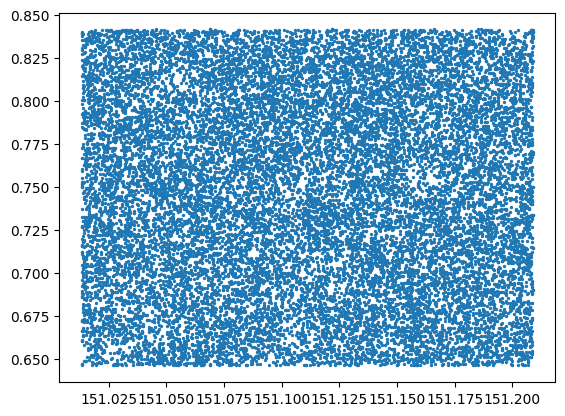

In [6]:
import matplotlib.pyplot as plt
plt.scatter(ra.values.to_numpy(), dec.values.to_numpy(), s=2)
plt.show()

In [7]:
from astropy.table import Table

In [8]:
quaia = Table.read("/ocean/projects/phy210048p/shared/hipscat/raw/quaia/quaia_G20.0.fits")

In [9]:
quaia_f = quaia[(quaia["ra"] > 151) & (quaia["ra"] < 151.2) & (quaia["dec"] > 0.645) & (quaia["dec"] < 0.850)]

In [10]:
quaia_f

source_id,unwise_objid,redshift_quaia,redshift_quaia_err,ra,dec,l,b,phot_g_mean_mag,phot_bp_mean_mag,phot_rp_mean_mag,mag_w1_vg,mag_w2_vg,pm,pmra,pmdec,pmra_error,pmdec_error
,,,,deg,deg,deg,deg,mag,mag,mag,mag,mag,mas / yr,mas / yr,mas / yr,mas / yr,mas / yr
int64,bytes16,float64,float64,float64,float64,float64,float64,float32,float32,float32,float64,float64,float64,float64,float64,float32,float32
3835104563501760512,1512p015o0001310,1.4530575275421143,0.12861508859634396,151.11340574755224,0.8244399179923664,239.1162973963892,42.106829048917206,19.068014,19.649548,18.340662,15.18438,13.920094,0.9169071464496882,0.8421062645543105,0.3627337238373288,0.47190616,0.4156275


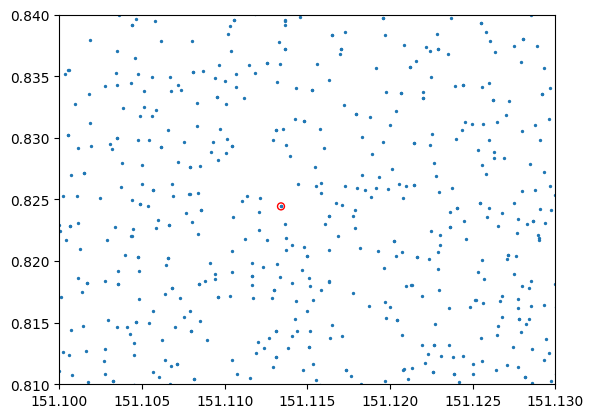

In [11]:
plt.scatter(ra.values.to_numpy(), dec.values.to_numpy(), s=2)
plt.scatter(quaia_f['ra'], quaia_f['dec'], s=25, facecolors="none", edgecolors="red")
plt.xlim([151.10, 151.13])
plt.ylim([0.81, 0.84])
plt.show()

In [12]:
quaia_in_ccd_hips = lsdb.from_dataframe(quaia_f.to_pandas(),
    catalog_name="from_dataframe",
    catalog_type="object",
    lowest_order=2,
    highest_order=5,
    threshold=100,)

In [13]:
quaia_in_ccd_hips.to_hipscat(f"./from_dataframe")

In [14]:
matched = catalog.crossmatch(quaia_in_ccd_hips, radius_arcsec=1, suffixes=("_hsc", "_qga"))
matched.compute()

/jet/home/mardom/.conda/envs/lsdb_env/lib/python3.10/site-packages/lsdb/dask/crossmatch_catalog_data.py:108: RuntimeWarning: Right catalog does not have a margin cache. Results may be incomplete and/or inaccurate.
  warnings.warn(


,coord_ra_hsc,coord_dec_hsc,base_ClassificationExtendedness_value_hsc,source_id_qga,unwise_objid_qga,redshift_quaia_qga,redshift_quaia_err_qga,ra_qga,dec_qga,l_qga,...,mag_w2_vg_qga,pm_qga,pmra_qga,pmdec_qga,pmra_error_qga,pmdec_error_qga,Norder_qga,Dir_qga,Npix_qga,_dist_arcsec
_hipscat_index,,,,,,,,,,,,,,,,,,,,,
7670209187908943872,151.113406,0.82444,0.0,3835104563501760512,b'1512p015o0001310',1.453058,0.128615,151.113406,0.82444,239.116297,...,13.920094,0.916907,0.842106,0.362734,0.471906,0.415628,2,0,106,0.0012
7670209187908943873,151.113406,0.82444,0.0,3835104563501760512,b'1512p015o0001310',1.453058,0.128615,151.113406,0.82444,239.116297,...,13.920094,0.916907,0.842106,0.362734,0.471906,0.415628,2,0,106,0.0012


In [15]:
ram = matched["coord_ra_hsc"].compute()
decm = matched["coord_dec_hsc"].compute()

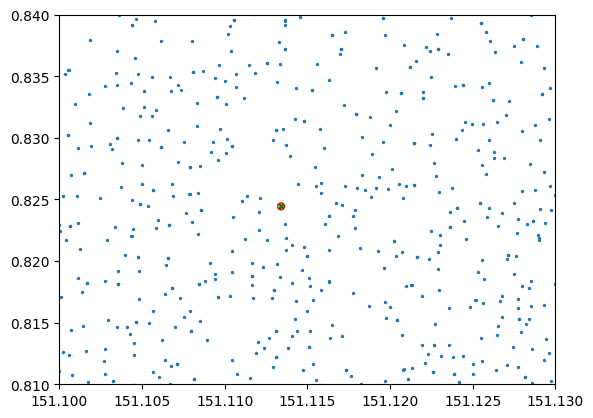

In [16]:
plt.scatter(ra.values.to_numpy(), dec.values.to_numpy(), s=2)
plt.scatter(quaia_f['ra'], quaia_f['dec'], s=25, facecolors="none", edgecolors="red")
plt.scatter(ram, decm, s=10, marker="x", color="green")
plt.xlim([151.10, 151.13])
plt.ylim([0.81, 0.84])
plt.show()

(array([ 3990., 16823.]),
 array([0. , 0.5, 1. ]),
 <BarContainer object of 2 artists>)

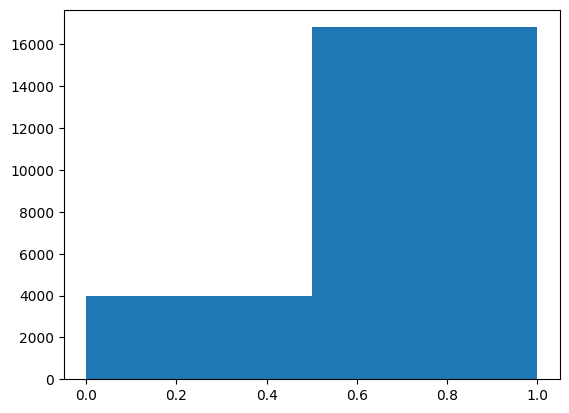

In [17]:
plt.hist(star_or_galax[~star_or_galax.isna()].to_numpy(), bins=2)